In [1]:
import sys
print(sys.version)
print(sys.executable)

3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
D:\Anaconda3\python.exe


In [ ]:
import ndlib.models.epidemics as ep

In [3]:
import numpy as np
print(np.random.multivariate_normal(mean=[1], cov=[[1**2]], size=50).shape)

(50, 1)


In [4]:
from filterpy.common import pretty_str, outer_product_sum
help(outer_product_sum)

Help on function outer_product_sum in module filterpy.common.helpers:

outer_product_sum(A, B=None)
    Computes the sum of the outer products of the rows in A and B
    
        P = \Sum {A[i] B[i].T} for i in 0..N
    
        Notionally:
    
        P = 0
        for y in A:
            P += np.outer(y, y)
    
    This is a standard computation for sigma points used in the UKF, ensemble
    Kalman filter, etc., where A would be the residual of the sigma points
    and the filter's state or measurement.
    
    The computation is vectorized, so it is much faster than the for loop
    for large A.
    
    Parameters
    ----------
    A : np.array, shape (M, N)
        rows of N-vectors to have the outer product summed
    
    B : np.array, shape (M, N)
        rows of N-vectors to have the outer product summed
        If it is `None`, it is set to A.
    
    Returns
    -------
    P : np.array, shape(N, N)
        sum of the outer product of the rows of A and B
    
    Exampl

In [30]:
a = np.arange(10).reshape(5,2)
print(a.shape)

(5, 2)


In [31]:
print(a.T.shape)

(2, 5)


<ipython-input-1-7f443f37fc31>:12: RuntimeWarning: divide by zero encountered in log
  result.append(np.log(abs(1 - 2*x)))


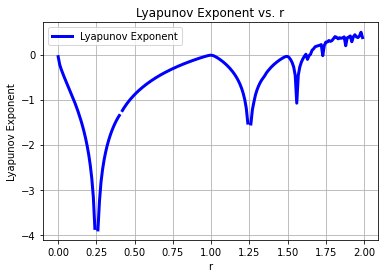

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rvalues = np.arange(0, 2, 0.01)
lambdas = []

for r in rvalues:
    x = 0.1
    result = []
    for t in range(100):
        x = x + r - x**2
        result.append(np.log(abs(1 - 2*x)))
    lambdas.append(np.mean(result))

plt.plot(rvalues, lambdas, 'b-', linewidth=3, label='Lyapunov Exponent')
plt.xlabel('r')
plt.ylabel('Lyapunov Exponent')
plt.title('Lyapunov Exponent vs. r')
plt.legend(loc='best')
plt.grid('on')
plt.show()

In [32]:
np.sum(np.outer(a,a))

2025

In [33]:
print(outer_product_sum(a.T))

[[  1   3   5   7   9]
 [  3  13  23  33  43]
 [  5  23  41  59  77]
 [  7  33  59  85 111]
 [  9  43  77 111 145]]


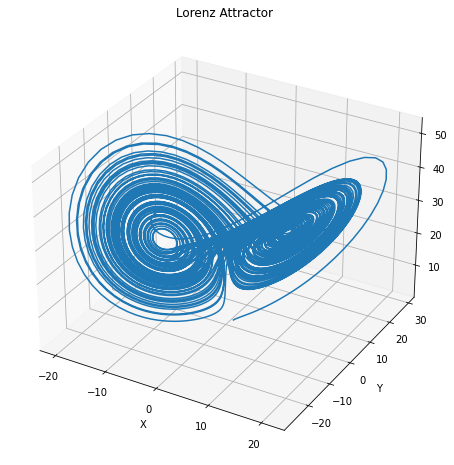

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义Lorenz系统
def lorenz(x, y, z, sigma=10, beta=8/3, rho=28):
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return dxdt, dydt, dzdt

# 时间步长和总时间
dt = 0.01
total_time = 100

# 初始条件
x, y, z = 1.0, 1.0, 1.0

# 存储轨迹
trajectory = []

for _ in range(int(total_time / dt)):
    dx, dy, dz = lorenz(x, y, z)
    x += dx * dt
    y += dy * dt
    z += dz * dt
    trajectory.append((x, y, z))

# 绘制轨迹
trajectory = np.array(trajectory)
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot3D(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Lorenz Attractor')
plt.show()

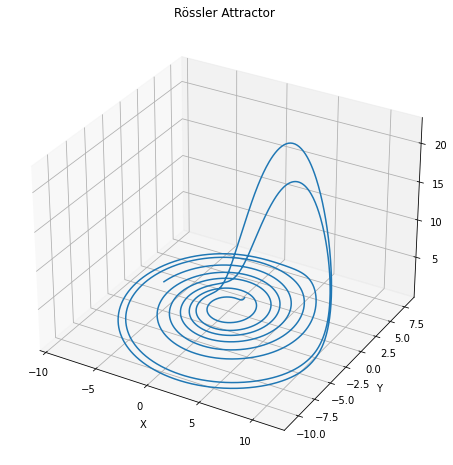

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 定义Rössler系统
def rossler(t, state, a, b, c):
    x, y, z = state
    dxdt = -y - z
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return [dxdt, dydt, dzdt]

# 参数
a = 0.2
b = 0.2
c = 5.7

# 初始条件
initial_state = [1.0, 1.0, 1.0]

# 时间范围
t_span = (0, 50)
t_eval = np.linspace(0, 50, 10000)

# 求解微分方程
solution = solve_ivp(rossler, t_span, initial_state, args=(a, b, c), t_eval=t_eval)

# 绘制轨迹
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(solution.y[0], solution.y[1], solution.y[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rössler Attractor')
plt.show()

In [23]:
print(a)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
